# Brain network study during resting states

### Bioinformatics and Network Medicine – PROJECT part 2

Laura Laurenti (1751854)  
Paolo Mandica (1898788)  
Lucia Testa (1764018)

In [1]:
%load_ext autoreload
%autoreload 2

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
open_eyes_path = 'data/S002/S002R01.edf'
closed_eyes_path = 'data/S002/S002R02.edf'

## 1. Connectivity graph

In [3]:
from connectivity_graph_base import ConnectivityGraph

### 1.1
**(mandatory)** Estimate functional brain connectivity among 64 channels using one of the
MVAR estimators: Partial Directed Coherence (PDC), Direct Transfer Function (DTF). Select
one relevant frequency value. Apply a threshold so that the resulting binary connectivity
matrices have network density equal to 20%. Create a graphical representation of the binary
adjacency matrix.

In [36]:
open_CG = ConnectivityGraph(open_eyes_path)
closed_CG = ConnectivityGraph(closed_eyes_path)

Extracting EDF parameters from C:\Users\paolo\dev\data_science\BIO\Bioinf2\data\S002\S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
EDF data loaded!
Extracting EDF parameters from C:\Users\paolo\dev\data_science\BIO\Bioinf2\data\S002\S002R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
EDF data loaded!


#### Open eyes (PDC)

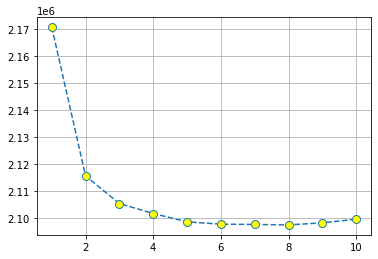

Best model order p: 8


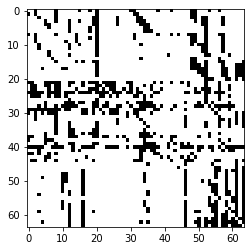

In [39]:
open_CG.compute_connectivity(freq=10, threshold=0.2, plot=True)
plt.imshow(open_CG.binary_adjacency_matrix, cmap='Greys', interpolation='nearest')
plt.show()

#### Closed eyes (PDC)

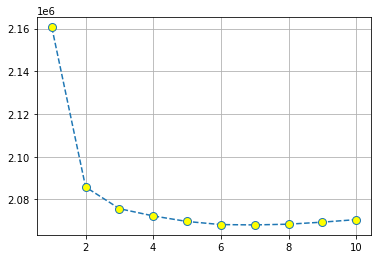

Best model order p: 7


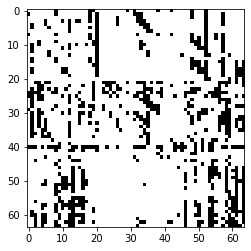

In [40]:
closed_CG.compute_connectivity(freq=10, threshold=0.2, plot=True)
plt.imshow(closed_CG.binary_adjacency_matrix, cmap='Greys', interpolation='nearest')
plt.show()

### 1.2
(class ‘A’) Perform task 1.1 using both estimators (PDC and DTF).

#### Open eyes (DTF)

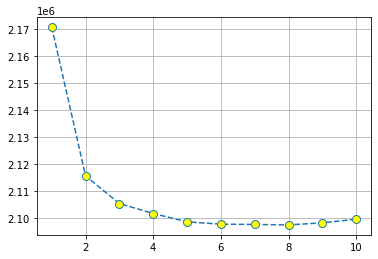

Best model order p: 8


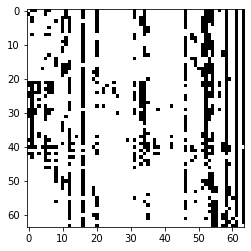

In [41]:
open_CG.compute_connectivity(freq=10, threshold=0.2, method="DTF", plot=True)
plt.imshow(open_CG.binary_adjacency_matrix, cmap='Greys', interpolation='nearest')
plt.show()

#### Closed eyes (DTF)

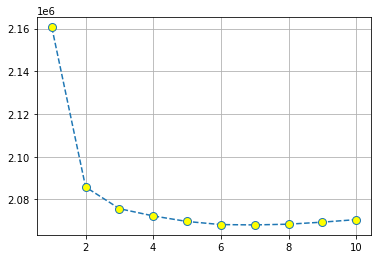

Best model order p: 7


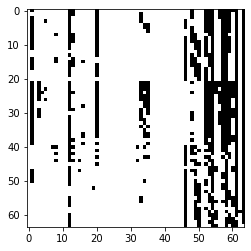

In [42]:
closed_CG.compute_connectivity(freq=10, threshold=0.2, method="DTF", plot=True)
plt.imshow(closed_CG.binary_adjacency_matrix, cmap='Greys', interpolation='nearest')
plt.show()

### 1.3
(class ‘A’) Perform task 1.1 using thresholds yielding the following density values: 1%, 5%,
10%, 20%, 30%, 50%.

#### Open eyes

Computing with density = 0.01
Computing with density = 0.05
Computing with density = 0.1
Computing with density = 0.2
Computing with density = 0.3
Computing with density = 0.5


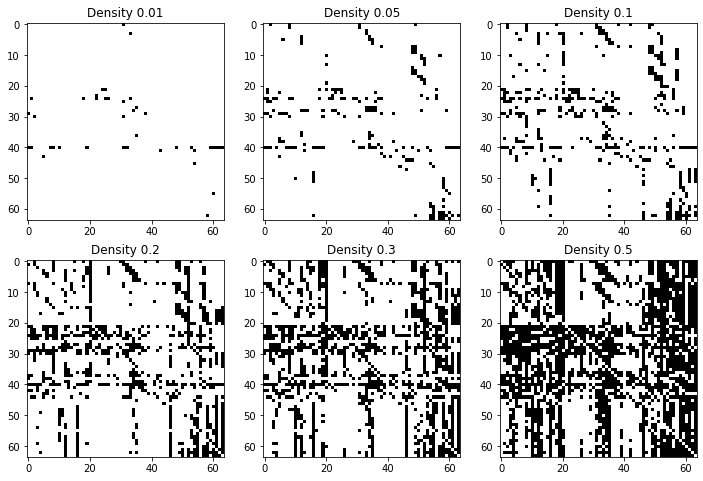

In [22]:
densities = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]

plt.figure(figsize=(12,8))
for i, d in enumerate(densities):
    print("Computing with density =", d)
    plt.subplot(2, 3, i+1)
    open_CG.compute_connectivity(freq=10, threshold=d)
    plt.title("Density {}".format(d))
    plt.imshow(open_CG.binary_adjacency_matrix, cmap='Greys', interpolation='nearest')
plt.show()

#### Closed eyes

Computing with density = 0.01
Computing with density = 0.05
Computing with density = 0.1
Computing with density = 0.2
Computing with density = 0.3
Computing with density = 0.5


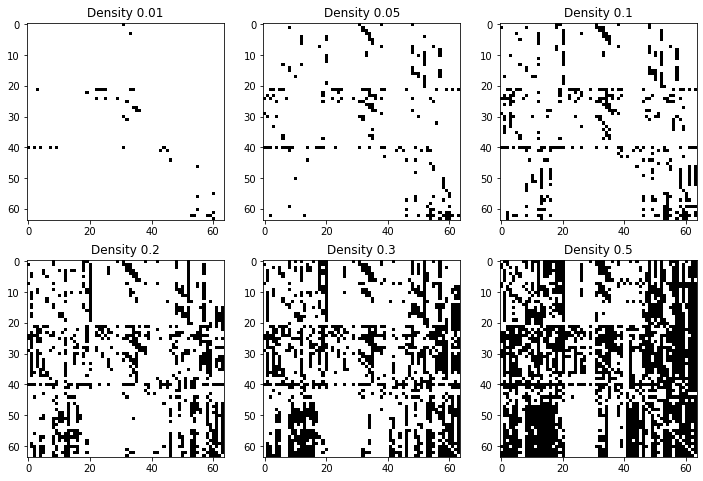

In [24]:
densities = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]

plt.figure(figsize=(12,8))
for i, d in enumerate(densities):
    print("Computing with density =", d)
    plt.subplot(2, 3, i+1)
    closed_CG.compute_connectivity(freq=10, threshold=d)
    plt.title("Density {}".format(d))
    plt.imshow(closed_CG.binary_adjacency_matrix, cmap='Greys', interpolation='nearest')
plt.show()

### 1.4
(class ‘D’) Considering the subset of 19 channels suggested in Figure 1 and Table 2, estimate
the connectivity using PDC or DTF and apply a statistical validation method (asymptotic statistics7, resampling procedure8, ...) to filter out values that are not significantly different from 0 (𝑃𝐷𝐶(𝑖,𝑗) ≠ 0 𝑤𝑖𝑡ℎ 𝑝 < 5%).

#### Open eyes

In [46]:
open_CG_sub = ConnectivityGraph(open_eyes_path, sub_channels=True)
open_CG_sub.compute_connectivity(freq=10, threshold=0.2)

Extracting EDF parameters from C:\Users\paolo\dev\data_science\BIO\Bioinf2\data\S002\S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
EDF data loaded!


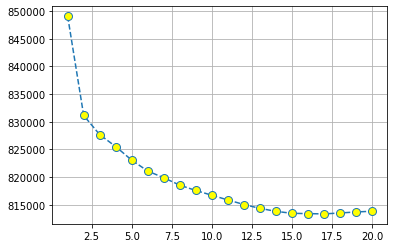


best model order p: 17



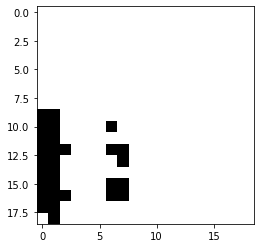

In [48]:
open_CG_sub.significance(method='PDC', max_order=20)

#### Closed eyes

In [49]:
closed_CG_sub = ConnectivityGraph(closed_eyes_path, sub_channels=True)
closed_CG_sub.compute_connectivity(freq=10, threshold=0.2)

Extracting EDF parameters from C:\Users\paolo\dev\data_science\BIO\Bioinf2\data\S002\S002R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
EDF data loaded!


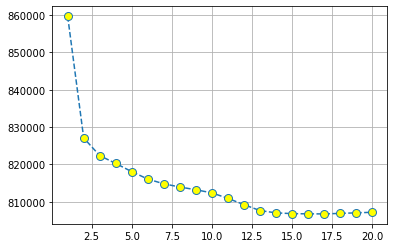

Best model order p: 17


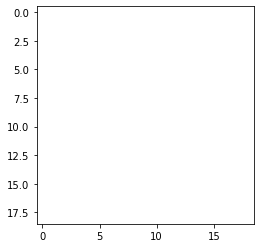

In [50]:
closed_CG_sub.significance(method='PDC', max_order=20)

### 1.5
(class ‘C’) Make a topographical representation of the networks (see example in Figure 2).
Cartesian coordinates of planar representation of EEG channels are available in Table 3 (see
also the file channel_locations.txt).

#### Open eyes

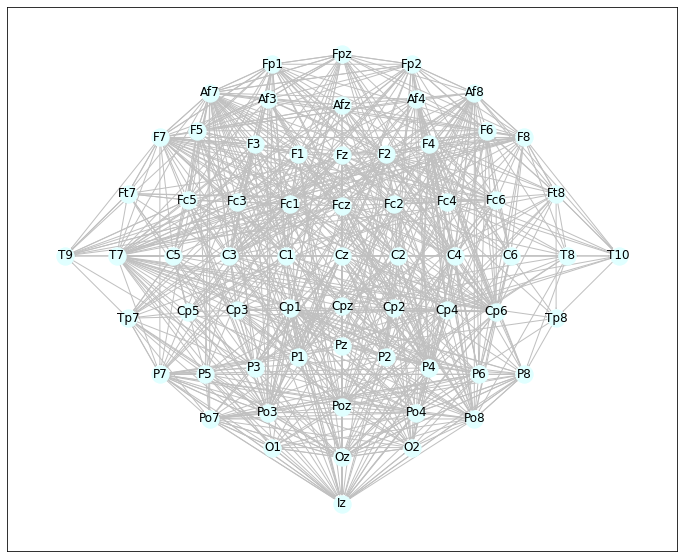

In [32]:
open_CG.compute_connectivity(freq=10, threshold=0.2)
open_CG.draw_Graph()

#### Closed eyes

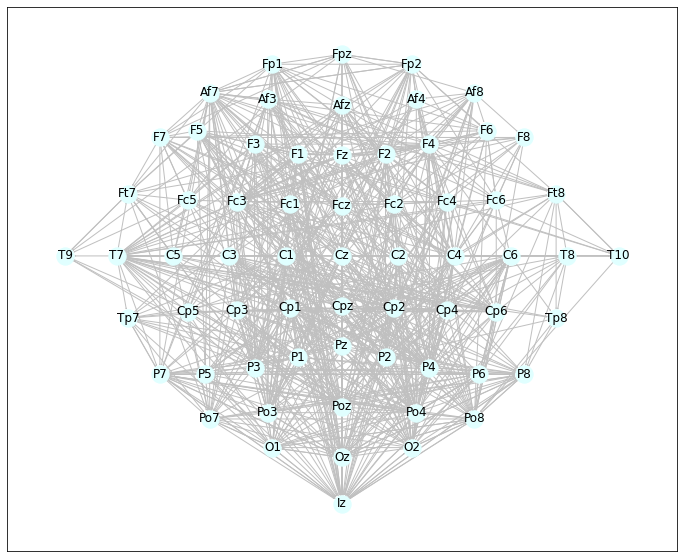

In [33]:
closed_CG.compute_connectivity(freq=10, threshold=0.2)
closed_CG.draw_Graph()

### 1.6
(class ‘B’) Perform task 1.1 considering a second frequency value belonging to a different
EEG rhythm with respect to the first choice.

#### Open eyes

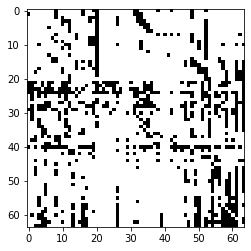

In [34]:
open_CG.compute_connectivity(freq=30, threshold=0.2)
plt.imshow(open_CG.binary_adjacency_matrix, cmap='Greys', interpolation='nearest')
plt.show()

#### Closed eyes

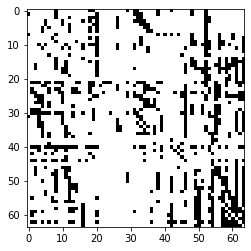

In [35]:
closed_CG.compute_connectivity(freq=30, threshold=0.2)
plt.imshow(closed_CG.binary_adjacency_matrix, cmap='Greys', interpolation='nearest')
plt.show()

## 2. Graph theory indices

In [3]:
from graph_theory_indices import GraphTheoryIndices as GTI

In [5]:
open_eyes_gti = GTI(open_eyes_path)

Extracting EDF parameters from C:\Users\paolo\dev\data_science\BIO\Bioinf2\data\S002\S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
EDF data loaded!


In [6]:
closed_eyes_gti = GTI(closed_eyes_path)

Extracting EDF parameters from C:\Users\paolo\dev\data_science\BIO\Bioinf2\data\S002\S002R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
EDF data loaded!


### 2.1
**(mandatory)** Compute binary global (average clustering coefficient, average path length) and local (degree, in/out-degree) graph indices. List the highest 10 channels for local indices.

In [8]:
def results_to_str(res):
    s = []
    for c, d in res:
        s.append("{} ({})".format(c, d))
    return ", ".join(s)

#### Open eyes

In [11]:
open_eyes_gti.compute_connectivity(freq=10, threshold=0.2)

avg_cl_coef, avg_path_len = open_eyes_gti.compute_global_indices()
print("##### BINARY GLOBAL INDICES #####\n")
print("Average Clustering Coefficient: %.3f" % (avg_cl_coef))
print("Average Path Length: %.3f" % (avg_path_len))

degree, in_degree, out_degree = open_eyes_gti.compute_local_indices()
print("\n##### BINARY LOCAL INDICES #####\n")
print("Degree (first 10): \t", results_to_str(degree[:10]), "\n")
print("In-Degree (first 10): \t", results_to_str(in_degree[:10]), "\n")
print("Out-Degree (first 10): \t", results_to_str(out_degree[:10]), "\n")

##### BINARY GLOBAL INDICES #####

Average Clustering Coefficient: 0.279
Average Path Length: 2.533

##### BINARY LOCAL INDICES #####

Degree (first 10): 	 Af7 (45), T7 (43), Iz (42), Oz (41), Cp6 (39), P4 (38), F7 (37), C4 (34), Cp1 (34), Af8 (34) 

In-Degree (first 10): 	 Cp6 (32), P4 (30), Iz (30), C4 (29), Oz (29), P7 (26), Cp1 (25), C3 (24), F2 (23), Po3 (23) 

Out-Degree (first 10): 	 T7 (43), Af7 (38), Af8 (32), F7 (30), Fp1 (26), Fp2 (23), F8 (21), Fpz (20), Af4 (20), F5 (20) 



#### Closed eyes

In [17]:
closed_eyes_gti.compute_connectivity(freq=10, threshold=0.2)

avg_cl_coef, avg_path_len = closed_eyes_gti.compute_global_indices()
print("##### BINARY GLOBAL INDICES #####\n")
print("Average Clustering Coefficient: %.3f" % (avg_cl_coef))
print("Average Path Length: %.3f" % (avg_path_len))

degree, in_degree, out_degree = closed_eyes_gti.compute_local_indices()
print("\n##### BINARY LOCAL INDICES #####\n")
print("Degree (first 10): \t", results_to_str(degree[:10]), "\n")
print("In-Degree (first 10): \t", results_to_str(in_degree[:10]), "\n")
print("Out-Degree (first 10): \t", results_to_str(out_degree[:10]), "\n")

##### BINARY GLOBAL INDICES #####

Average Clustering Coefficient: 0.276
Average Path Length: 2.115

##### BINARY LOCAL INDICES #####

Degree (first 10): 	 Iz (49), Oz (45), Poz (44), Po4 (44), T7 (37), Po8 (37), Fc3 (36), C4 (36), O2 (36), Af7 (34) 

In-Degree (first 10): 	 Iz (33), C4 (30), Oz (30), Po4 (29), Fc3 (26), Poz (26), P4 (24), P8 (24), Po8 (24), Cp6 (23) 

Out-Degree (first 10): 	 T7 (37), Af7 (28), O2 (25), Fp1 (24), Af3 (23), F5 (21), Fp2 (20), O1 (20), Af8 (18), F1 (18) 



### 2.2

(class ‘D’) Search in the literature a definition of small-worldness index (i.e. an index
describing the small-world organization of a network) and compute it.

A **small-world network** is a type of mathematical graph in which most nodes are not neighbors of one another, but the neighbors of any given node are likely to be neighbors of each other and most nodes can be reached from every other node by a small number of hops or steps.  
This means that, despite the size of the network, each pair of nodes is connected by a not large number of edges (*“Six degrees of separation”*, S. Milgram, 1967).

A network of "large" dimensions has the property of a small world (small world) if its average
path length is "small":
$$L << N \text{ per } N >> 1$$
with $L =$ average path length and $N =$ number of nodes in the network.

Finally, a network G is defined small-world if $L_G > L_{rand}$ and $C_G >> C_{rand}$ where:  
- $L_G, C_G$ represent respectively the average path length and the clustering coefficient of the graph G;
- $L_{rand}, C_{rand}$ represent respectively the average path length and the clustering coefficient in random graphs.

The **small-worldness index** is defined as:
$$S = \frac{C_G / C_{rand}}{L_C / L_{rand}}, \text{ with } S>>1.$$

#### Open eyes

In [100]:
open_eyes_gti.compute_connectivity(freq=10, threshold=0.2)
SMI = open_eyes_gti.compute_SMI()
print("Small-worldness Index: %.3f" % (SMI))

Computing random graphs...
Computing SMI...
Completed!
Small-worldness Index: 0.965


#### Closed eyes

In [101]:
closed_eyes_gti.compute_connectivity(freq=10, threshold=0.2)
SMI = closed_eyes_gti.compute_SMI()
print("Small-worldness Index: %.3f" % (SMI))

Computing random graphs...
Computing SMI...
Completed!
Small-worldness Index: 1.054


Both the networks have a **small-worldness index** near 1. This means that we cannot precisely classify them as small world networks.

### 2.3

(class ‘B’) Compare the global indices extracted from PDC and DTF connectivity estimations.

Since we have already computed the global indices from PDC in ex. 2.1, here we are just going to compute them from DTF. 

#### Open eyes

In [13]:
open_eyes_gti.compute_connectivity(freq=10, threshold=0.2, method="DTF")

avg_cl_coef, avg_path_len = open_eyes_gti.compute_global_indices()
print("##### BINARY GLOBAL INDICES #####\n")
print("Average Clustering Coefficient: %.3f" % (avg_cl_coef))
print("Average Path Length: %.3f" % (avg_path_len))

degree, in_degree, out_degree = closed_eyes_gti.compute_local_indices()
print("\n##### BINARY LOCAL INDICES #####\n")
print("Degree (first 10): \t", results_to_str(degree[:10]), "\n")
print("In-Degree (first 10): \t", results_to_str(in_degree[:10]), "\n")
print("Out-Degree (first 10): \t", results_to_str(out_degree[:10]), "\n")

##### BINARY GLOBAL INDICES #####

Average Clustering Coefficient: 0.454
Average Path Length: 0.892

##### BINARY LOCAL INDICES #####

Degree (first 10): 	 Oz (73), Iz (71), P8 (69), Po4 (68), C4 (64), Poz (56), Fc3 (52), P4 (52), P6 (52), Po8 (48) 

In-Degree (first 10): 	 Oz (63), Iz (63), P8 (61), Po4 (61), C4 (54), Poz (48), P4 (43), P6 (43), Cp6 (39), P7 (39) 

Out-Degree (first 10): 	 Af7 (20), Fp1 (19), Fpz (18), Fp2 (18), Af3 (17), Afz (17), F7 (16), F5 (16), F3 (16), Fc5 (15) 



#### Closed eyes

In [14]:
closed_eyes_gti.compute_connectivity(freq=10, threshold=0.2, method="DTF")

avg_cl_coef, avg_path_len = closed_eyes_gti.compute_global_indices()
print("##### BINARY GLOBAL INDICES #####\n")
print("Average Clustering Coefficient: %.3f" % (avg_cl_coef))
print("Average Path Length: %.3f" % (avg_path_len))

degree, in_degree, out_degree = closed_eyes_gti.compute_local_indices()
print("\n##### BINARY LOCAL INDICES #####\n")
print("Degree (first 10): \t", results_to_str(degree[:10]), "\n")
print("In-Degree (first 10): \t", results_to_str(in_degree[:10]), "\n")
print("Out-Degree (first 10): \t", results_to_str(out_degree[:10]), "\n")

##### BINARY GLOBAL INDICES #####

Average Clustering Coefficient: 0.461
Average Path Length: 0.617

##### BINARY LOCAL INDICES #####

Degree (first 10): 	 Oz (73), Iz (71), P8 (69), Po4 (68), C4 (64), Poz (56), Fc3 (52), P4 (52), P6 (52), Po8 (48) 

In-Degree (first 10): 	 Oz (63), Iz (63), P8 (61), Po4 (61), C4 (54), Poz (48), P4 (43), P6 (43), Cp6 (39), P7 (39) 

Out-Degree (first 10): 	 Af7 (20), Fp1 (19), Fpz (18), Fp2 (18), Af3 (17), Afz (17), F7 (16), F5 (16), F3 (16), Fc5 (15) 



### 2.4

(class ‘C’) Study the behaviour of global graph indices in function of network density (see point 1.3 for density values).

#### Open eyes

Computing for t = 0.01
Computing for t = 0.05
Computing for t = 0.1
Computing for t = 0.2
Computing for t = 0.3
Computing for t = 0.5
Time passed: 53 seconds


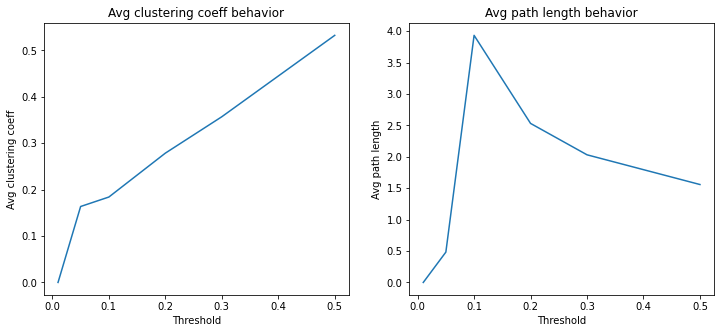

In [20]:
thresholds = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
open_eyes_gti.plot_global_indices(thresholds)

#### Closed eyes

Computing for t = 0.01
Computing for t = 0.05
Computing for t = 0.1
Computing for t = 0.2
Computing for t = 0.3
Computing for t = 0.5
Time passed: 61 seconds


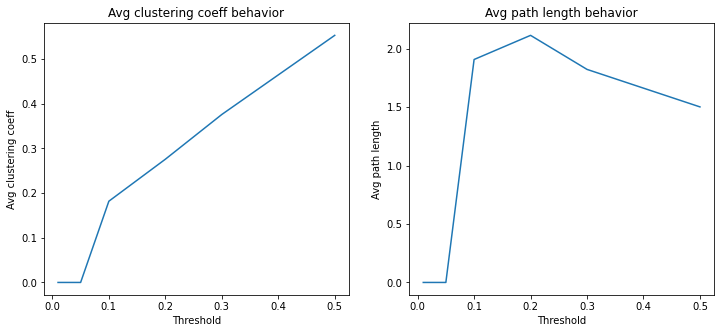

In [21]:
thresholds = [0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
closed_eyes_gti.plot_global_indices(thresholds)

### 2.5

(class ‘B’) Make a topographical representation of local indices.

#### Open eyes

In [17]:
open_eyes_gti.compute_connectivity(freq=10, threshold=0.2)

##### Topographical representation of "degree"

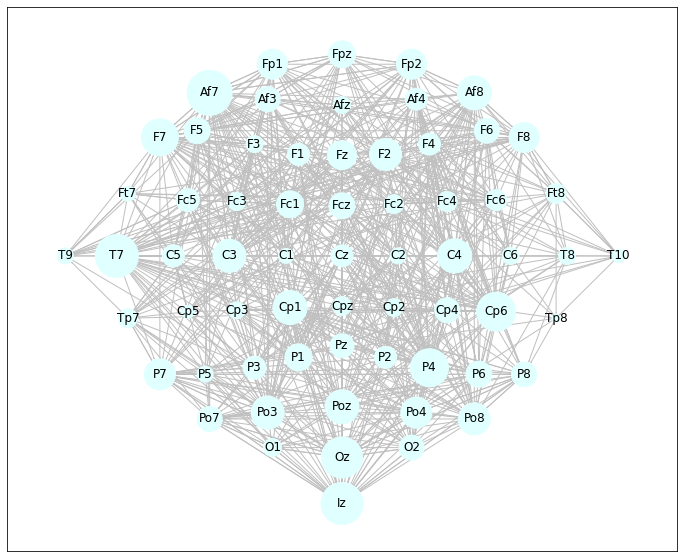

In [16]:
open_eyes_gti.draw_local_indices("degree")

##### Topographical representation of "in-degree"

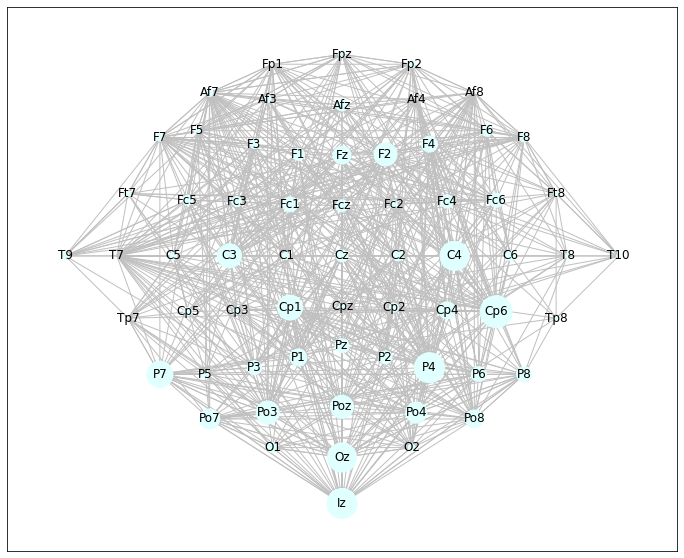

In [18]:
open_eyes_gti.draw_local_indices("in_degree")

##### Topographical representation of "out-degree"

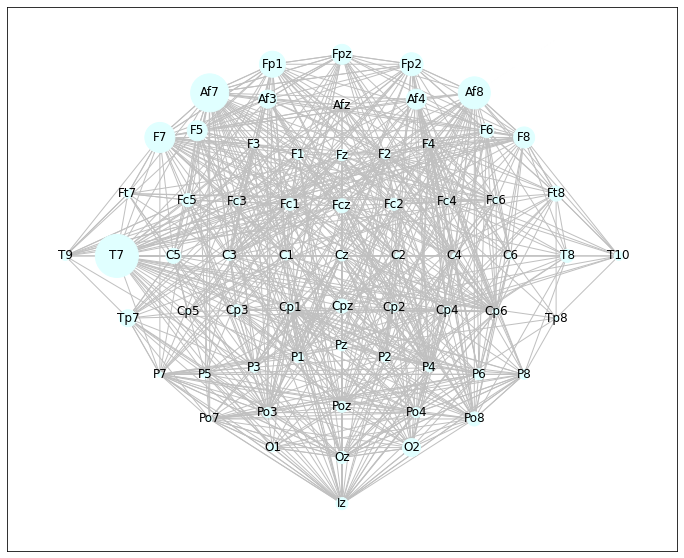

In [20]:
open_eyes_gti.draw_local_indices("out_degree")

#### Closed eyes

In [22]:
closed_eyes_gti.compute_connectivity(freq=10, threshold=0.2)

##### Topographical representation of "degree"

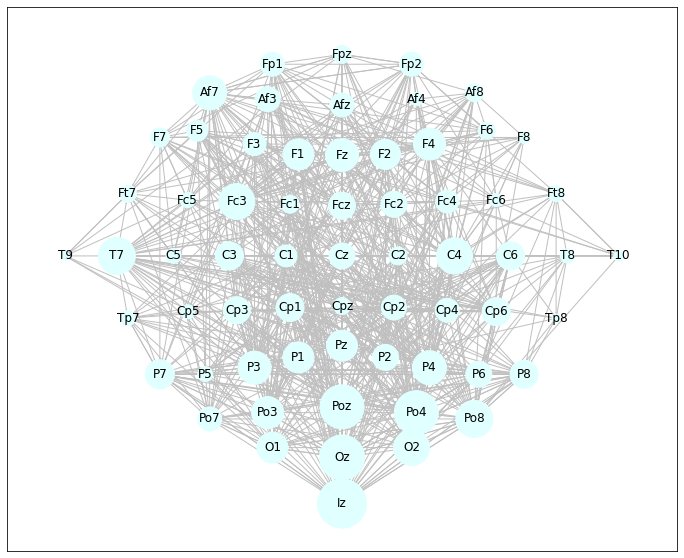

In [23]:
closed_eyes_gti.draw_local_indices("degree")

##### Topographical representation of "in-degree"

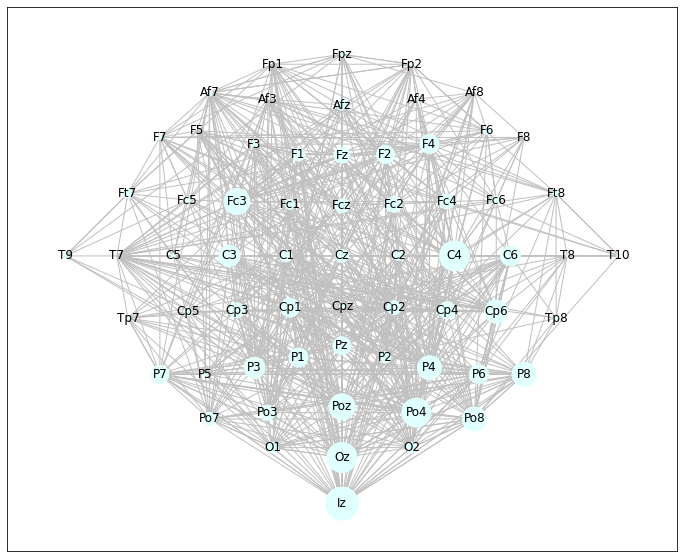

In [24]:
closed_eyes_gti.draw_local_indices("in_degree")

##### Topographical representation of "out-degree"

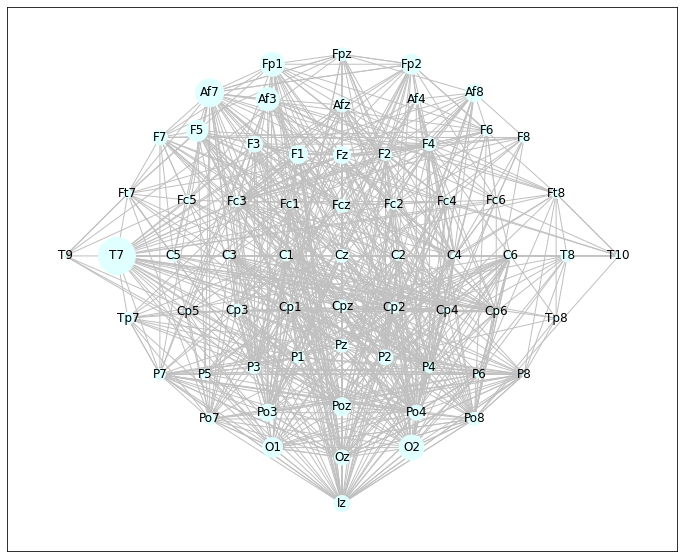

In [25]:
closed_eyes_gti.draw_local_indices("out_degree")

### 2.7

(class ‘C’) Perform point 2.1 considering the weighted version of the graph indices definitions.

#### Open eyes

In [26]:
open_eyes_gti.compute_connectivity(freq=10, threshold=0.2)

avg_cl_coef, avg_path_len = open_eyes_gti.compute_global_indices(weighted=True)
print("##### BINARY GLOBAL INDICES #####\n")
print("Average Clustering Coefficient: %.3f" % (avg_cl_coef))
print("Average Path Length: %.3f" % (avg_path_len))

degree, in_degree, out_degree = open_eyes_gti.compute_local_indices(weighted=True)
print("\n##### BINARY LOCAL INDICES #####\n")
print("Degree (first 10): \t", results_to_str(degree[:10]), "\n")
print("In-Degree (first 10): \t", results_to_str(in_degree[:10]), "\n")
print("Out-Degree (first 10): \t", results_to_str(out_degree[:10]), "\n")

##### BINARY GLOBAL INDICES #####

Average Clustering Coefficient: 0.071
Average Path Length: 0.358

##### BINARY LOCAL INDICES #####

Degree (first 10): 	 Af7 (45), T7 (43), Iz (42), Oz (41), Cp6 (39), P4 (38), F7 (37), C4 (34), Cp1 (34), Af8 (34) 

In-Degree (first 10): 	 Cp6 (32), P4 (30), Iz (30), C4 (29), Oz (29), P7 (26), Cp1 (25), C3 (24), F2 (23), Po3 (23) 

Out-Degree (first 10): 	 T7 (43), Af7 (38), Af8 (32), F7 (30), Fp1 (26), Fp2 (23), F8 (21), Fpz (20), Af4 (20), F5 (20) 



#### Closed eyes

In [24]:
closed_eyes_gti.compute_connectivity(freq=10, threshold=0.2, method="DTF")

avg_cl_coef, avg_path_len = closed_eyes_gti.compute_global_indices(weighted=True)
print("##### BINARY GLOBAL INDICES #####\n")
print("Average Clustering Coefficient: %.3f" % (avg_cl_coef))
print("Average Path Length: %.3f" % (avg_path_len))

degree, in_degree, out_degree = closed_eyes_gti.compute_local_indices(weighted=True)
print("\n##### BINARY LOCAL INDICES #####\n")
print("Degree (first 10): \t", results_to_str(degree[:10]), "\n")
print("In-Degree (first 10): \t", results_to_str(in_degree[:10]), "\n")
print("Out-Degree (first 10): \t", results_to_str(out_degree[:10]), "\n")

##### BINARY GLOBAL INDICES #####

Average Clustering Coefficient: 0.163
Average Path Length: 0.099

##### BINARY LOCAL INDICES #####

Degree (first 10): 	 Oz (73), Iz (71), P8 (69), Po4 (68), C4 (64), Poz (56), Fc3 (52), P4 (52), P6 (52), Po8 (48) 

In-Degree (first 10): 	 Oz (63), Iz (63), P8 (61), Po4 (61), C4 (54), Poz (48), P4 (43), P6 (43), Cp6 (39), P7 (39) 

Out-Degree (first 10): 	 Af7 (20), Fp1 (19), Fpz (18), Fp2 (18), Af3 (17), Afz (17), F7 (16), F5 (16), F3 (16), Fc5 (15) 



## 3. Motif analysis

In [50]:
from motif_analyzer import MotifAnalyzer

In [53]:
open_motif_an = MotifAnalyzer(open_eyes_path)
closed_motif_an = MotifAnalyzer(closed_eyes_path)

Extracting EDF parameters from C:\Users\paolo\dev\data_science\BIO\Bioinf2\data\S002\S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
EDF data loaded!
Extracting EDF parameters from C:\Users\paolo\dev\data_science\BIO\Bioinf2\data\S002\S002R02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
EDF data loaded!


In [55]:
open_motif_an.compute_connectivity(freq=10, threshold=0.2)
closed_motif_an.compute_connectivity(freq=10, threshold=0.2)

### 3.1
(**mandatory**) Perform motifs analysis to investigate the presence of 3-node configurations in
the networks: determine their frequency and statistical significance (motifs, anti-motifs).

#### Open eyes

[11303 15987  2045  2579  2714  2849  1781   634   849    53    72   111
   242   296   118    31]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


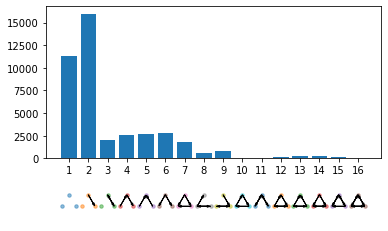

In [31]:
open_motif_an.compute_motifs(algorithm='brute-force')

[  -1   -1   -1 2579 2714 2849 1781  634  849   53   72  111  242  296
  118   31]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


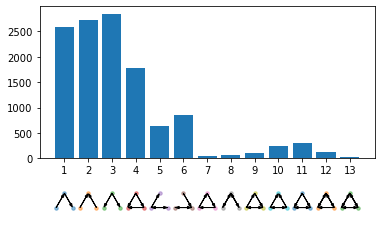

In [32]:
open_motif_an.compute_motifs(algorithm='louzoun')

#### Closed eyes

[11899 15480  2292  2603  2611  2154  1501   684  1248   109   121   197
   218   359   162    26]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


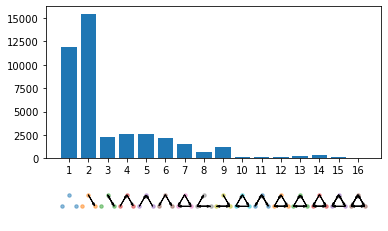

In [33]:
closed_motif_an.compute_motifs(algorithm='brute-force')

[  -1   -1   -1 2603 2611 2154 1501  684 1248  109  121  197  218  359
  162   26]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


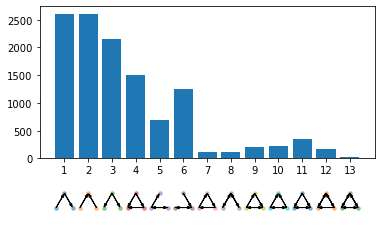

In [34]:
closed_motif_an.compute_motifs(algorithm='louzoun')

### 3.2
(class ‘C’) For the motif with pattern 𝐴 → 𝐵 ← 𝐶, create a topographical representation of the
networks considering only the connections involved in this configuration.

#### Open eyes

Density: 0.36235119047619047


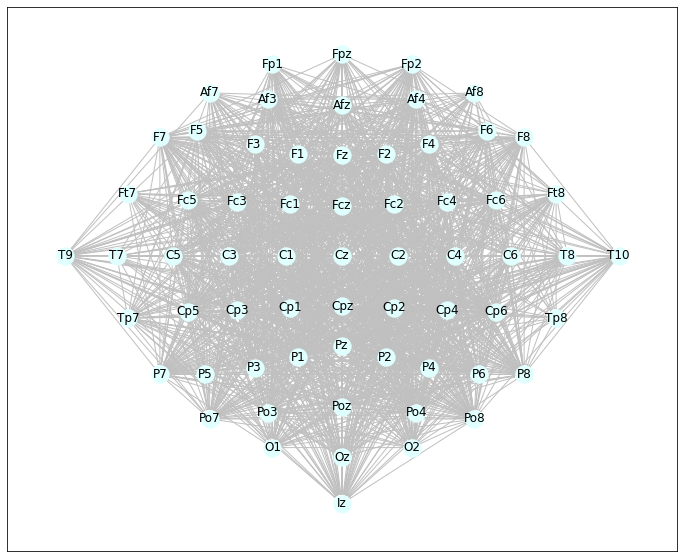

In [47]:
open_motif_an.create_graph_motifs()

#### Closed eyes

Density: 0.3836805555555556


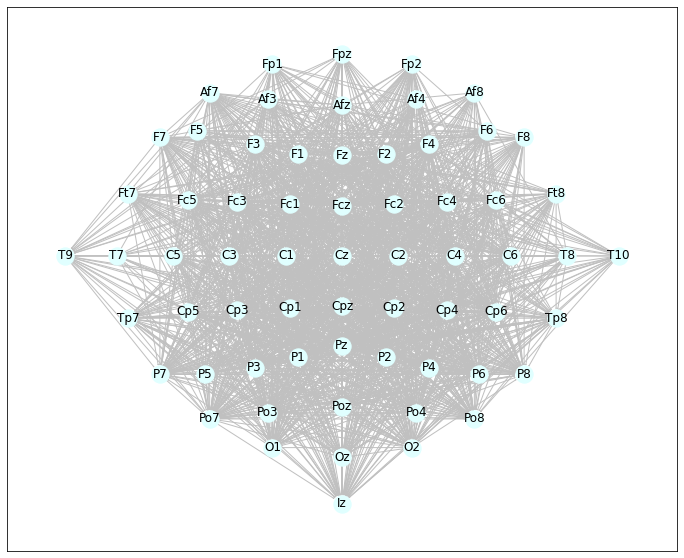

In [46]:
closed_motif_an.create_graph_motifs()

## 4. Community detection

### 4.1
(**mandatory**) Determine number and composition (i.e. list of nodes) of the communities
obtained applying one of the algorithms introduced during the course.

#### Open eyes

In [78]:
open_communities = open_motif_an.community_composition()

Nodes that belong to community  0 :
Fcz Cz C2 Cp3 P1 P4 

Nodes that belong to community  1 :
Fc5 Fc3 Fc1 C5 C3 C1 Cp5 Fp1 Fpz Fp2 Af7 Af3 F7 F5 F3 F1 Ft7 T9 Tp7 P3 Po3 

Nodes that belong to community  2 :
Fc2 Fc4 Fc6 C4 C6 Cp4 Cp6 Afz Af4 Af8 Fz F2 F4 F6 F8 Ft8 T8 T10 

Nodes that belong to community  3 :
Cp1 Cpz Cp2 T7 Tp8 P7 P5 Pz P2 P6 P8 Po7 Poz Po4 Po8 O1 Oz O2 Iz 



#### Closed eyes

In [77]:
closed_communities = closed_motif_an.community_composition()

Nodes that belong to community  0 :
Fc5 C5 Af7 F7 Ft7 T9 P3 

Nodes that belong to community  1 :
Fc3 Fc1 Fcz Fc4 Cz C2 Cp5 Cp3 Cpz Cp2 Cp6 F5 F3 F1 Fz P4 Poz 

Nodes that belong to community  2 :
C3 C1 C6 Cp1 Ft8 T7 T8 T10 Tp7 Tp8 P7 P5 P1 Pz P2 P6 P8 Po7 Po3 Po4 Po8 O1 Oz O2 Iz 

Nodes that belong to community  3 :
Fc2 Fc6 C4 Cp4 Fp1 Fpz Fp2 Af3 Afz Af4 Af8 F2 F4 F6 F8 



### 4.2
(class ‘B’) Make a graphical representation of the community structure in both rest conditions.

#### Open eyes

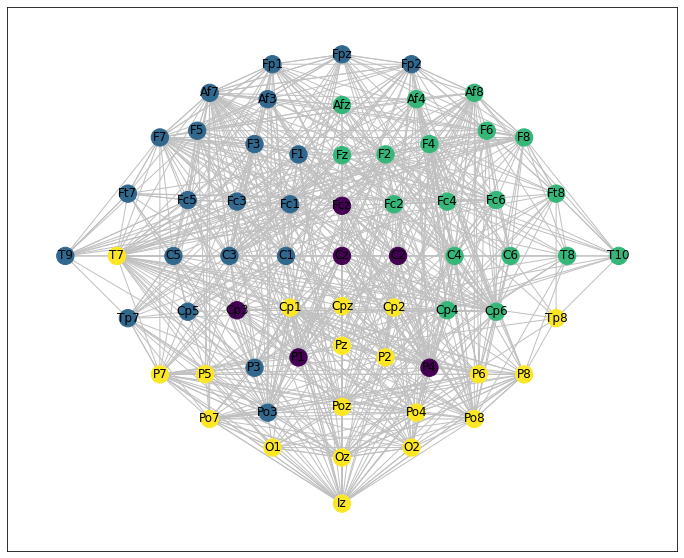

In [80]:
open_motif_an.draw_community_graph(open_communities)

#### Closed eyes

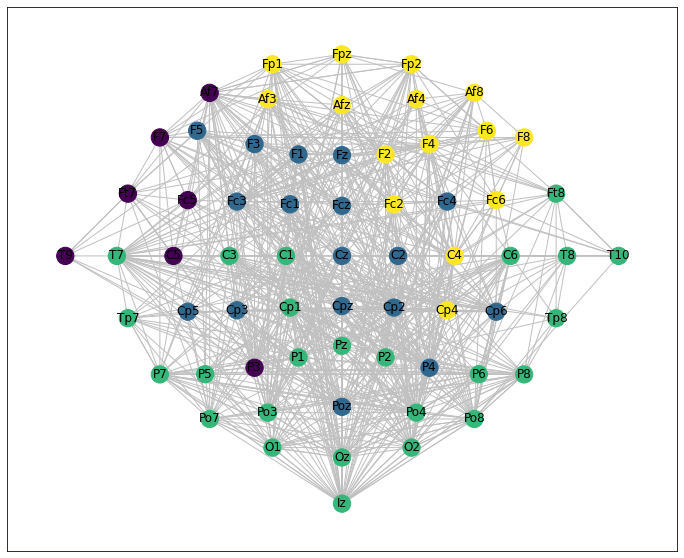

In [79]:
closed_motif_an.draw_community_graph(closed_communities)

### 4.3
(class ‘C’) Compare the community structure obtained by means of two different methods
(modularity-based vs information theory-based approaches).

#### Open eyes

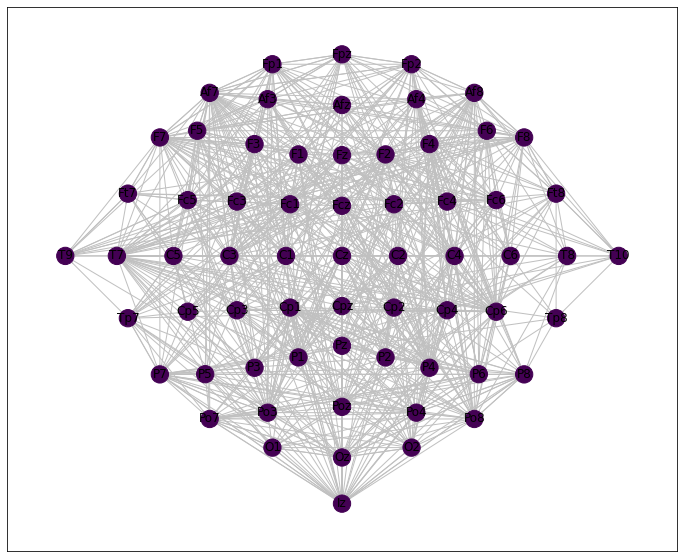

In [90]:
communities_open = open_motif_an.get_communities_infomap()
open_motif_an.draw_community_graph(communities_open)

#### Closed eyes

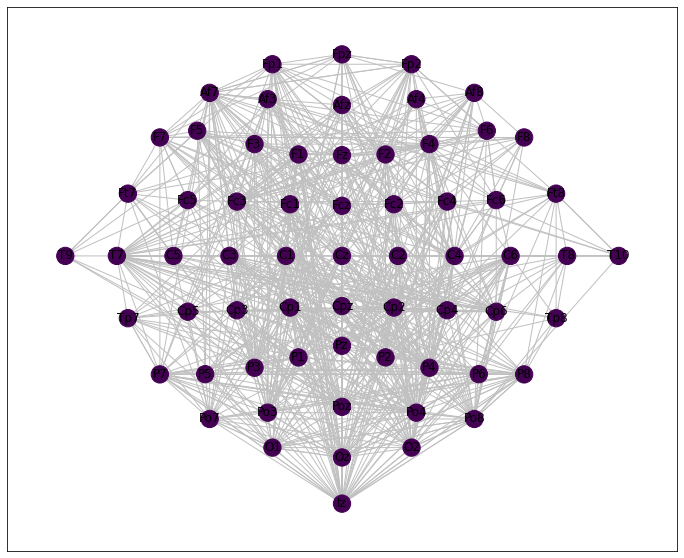

In [91]:
communities_closed = closed_motif_an.get_communities_infomap()
closed_motif_an.draw_community_graph(communities_closed)